In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [ ]:
df = pd.read_excel('/content/1730285881-Airbnb_Open_Data.xlsx')

In [ ]:
df.head()

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,Construction year,price,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,2020.0,966.0,193.0,10.0,9.0,2021-10-19,0.21,4.0,6.0,286.0
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,2007.0,142.0,28.0,30.0,45.0,2022-05-21,0.38,4.0,2.0,228.0
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,2005.0,620.0,124.0,3.0,0.0,NaT,NaN,5.0,1.0,352.0
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,2005.0,368.0,74.0,30.0,270.0,2019-07-05,4.64,4.0,1.0,322.0
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,2009.0,204.0,41.0,10.0,9.0,2018-11-19,0.10,3.0,1.0,289.0


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 102058 entries, 0 to 102057
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   id                              102058 non-null  int64         
 1   NAME                            101788 non-null  object        
 2   host id                         102058 non-null  int64         
 3   host_identity_verified          101769 non-null  object        
 4   host name                       101652 non-null  object        
 5   neighbourhood group             102029 non-null  object        
 6   neighbourhood                   102042 non-null  object        
 7   lat                             102050 non-null  float64       
 8   long                            102050 non-null  float64       
 9   country                         101526 non-null  object        
 10  country code                    101927 non-null  object      

In [ ]:
df.duplicated().value_counts()

,count
False,102058


In [ ]:
df [df['neighbourhood group'] == 'brookln']

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,Construction year,price_$,service_fee_$,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365


In [ ]:
df.drop_duplicates(inplace = True)

df.drop(['house_rules', 'license'], axis = 1, inplace = True)

df['price']= df['price'].str.replace('$','', regex= False)
df['service fee'] = df['service fee'].str.replace('$','', regex= False)

df['price'] = df['price'].str.replace(',','', regex = False)
df['service fee'] =df['service fee'].str.replace(',','', regex =False)

df.rename(columns = { 'price': 'price_$', 'service fee': 'service_fee_$' }, inplace =True)

df.dropna(inplace = True)

df['price_$'] =df['price_$'].astype(float)
df['service_fee_$'] = df['service_fee_$'].astype(float)
df['host id'] = df['host id'].astype(str)
df['last review'] = pd.to_datetime(df['last review'])
df['id'] = df['id'].astype(str)
df['Construction year']= df['Construction year'].astype(int)

In [ ]:

df = df.drop(df[df['availability 365']> 500].index)

In [ ]:
df.duplicated().value_counts()

,count
False,102058


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 83389 entries, 0 to 102040
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              83389 non-null  object        
 1   NAME                            83389 non-null  object        
 2   host id                         83389 non-null  object        
 3   host_identity_verified          83389 non-null  object        
 4   host name                       83389 non-null  object        
 5   neighbourhood group             83389 non-null  object        
 6   neighbourhood                   83389 non-null  object        
 7   lat                             83389 non-null  float64       
 8   long                            83389 non-null  float64       
 9   country                         83389 non-null  object        
 10  country code                    83389 non-null  object        
 11  instan

In [ ]:
df.describe()

,lat,long,instant_bookable,Construction year,price_$,service_fee_$,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365
count,83389.000000,83389.000000,83389.000000,83389.000000,83389.000000,83389.000000,83389.000000,83389.000000,83389,83389.000000,83389.000000,83389.000000,83389.000000
mean,40.727349,-73.948502,0.497704,2012.487810,626.209668,125.243114,7.406109,32.261305,2019-06-08 21:32:53.396971008,1.377352,3.278694,7.032894,141.746369
min,40.504560,-74.249840,0.000000,2003.000000,50.000000,10.000000,-365.000000,1.000000,2012-07-11 00:00:00,0.010000,1.000000,1.000000,-10.000000
25%,40.687640,-73.982110,0.000000,2007.000000,340.000000,68.000000,2.000000,3.000000,2018-10-25 00:00:00,0.220000,2.000000,1.000000,6.000000
50%,40.721320,-73.953710,0.000000,2012.000000,625.000000,125.000000,3.000000,11.000000,2019-06-13 00:00:00,0.740000,3.000000,1.000000,101.000000
75%,40.762600,-73.930800,1.000000,2017.000000,914.000000,183.000000,5.000000,38.000000,2019-07-05 00:00:00,2.010000,4.000000,2.000000,266.000000
max,40.916970,-73.705220,1.000000,2022.000000,1200.000000,240.000000,5645.000000,1024.000000,2022-05-21 00:00:00,90.000000,5.000000,332.000000,426.000000
std,0.056326,0.050342,0.499998,5.760526,331.803443,66.364212,28.105563,51.954290,NaN,1.751091,1.283678,29.555458,133.377544


In [ ]:
property_types = df['room type'].value_counts().to_frame()
property_types

,count
room type,
Entire home/apt,44161
Private room,37474
Shared room,1646
Hotel room,108


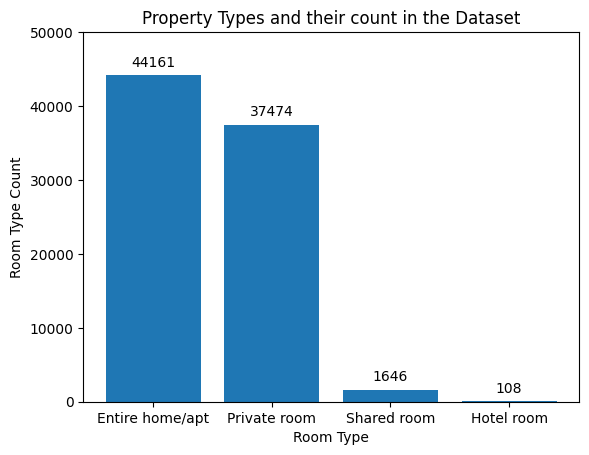

In [ ]:
room_type_bar=plt.bar(property_types.index, property_types.loc[:, "count"]);
plt.bar_label(room_type_bar, labels =property_types.loc[:, "count"], padding = 4);
plt.ylim([0,50000]);
plt.xlabel('Room Type');
plt.ylabel('Room Type Count');
plt.title('Property Types and their count in the Dataset');

In [ ]:
hood_group = df ['neighbourhood group'].value_counts().to_frame()
hood_group

,count
neighbourhood group,
Brooklyn,34622
Manhattan,34560
Queens,11124
Bronx,2267
Staten Island,816


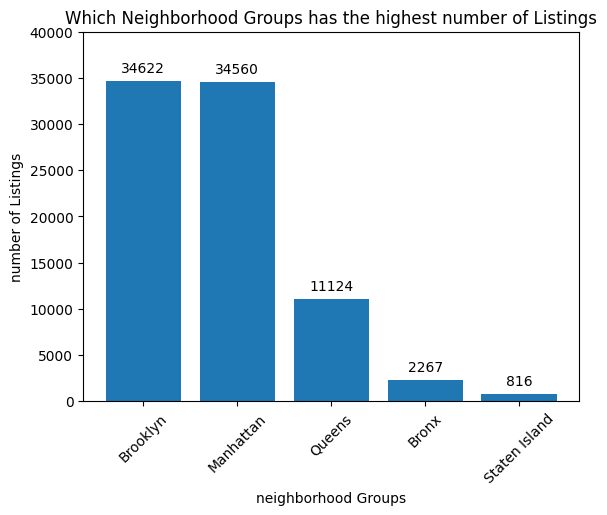

In [ ]:
hood_group_bar = plt.bar(hood_group.index, hood_group.loc[:, "count"]);
plt.bar_label(hood_group_bar, labels =hood_group.loc[:, "count"], padding=4);
plt.ylim([0, 40000]);
plt.xlabel('neighborhood Groups');
plt.ylabel('number of Listings');
plt.xticks (rotation =45);
plt.title('Which Neighborhood Groups has the highest number of Listings');

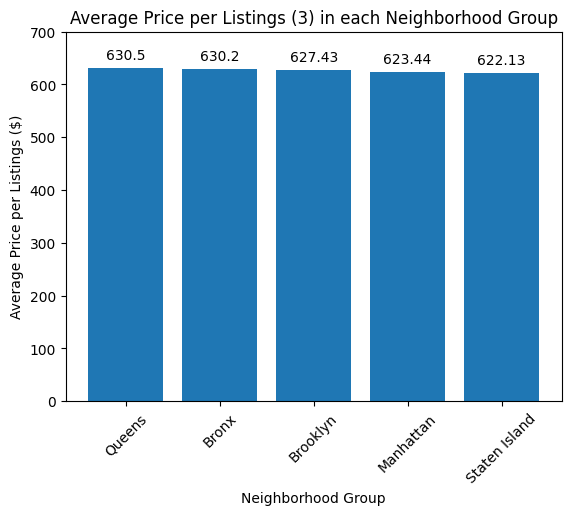

In [ ]:
avg_price =df.groupby('neighbourhood group')['price_$'].mean().sort_values(ascending =False).to_frame()
avg_price_bar =plt.bar(avg_price.index, avg_price.loc[:, 'price_$']);
plt.bar_label(avg_price_bar, labels =round(avg_price.loc[:,"price_$"], 2), label_type = 'edge', padding = 4);
plt.ylim([0,700]);
plt.xlabel("Neighborhood Group");
plt.ylabel("Average Price per Listings ($)");
plt.xticks (rotation = 45);
plt.title("Average Price per Listings (3) in each Neighborhood Group");

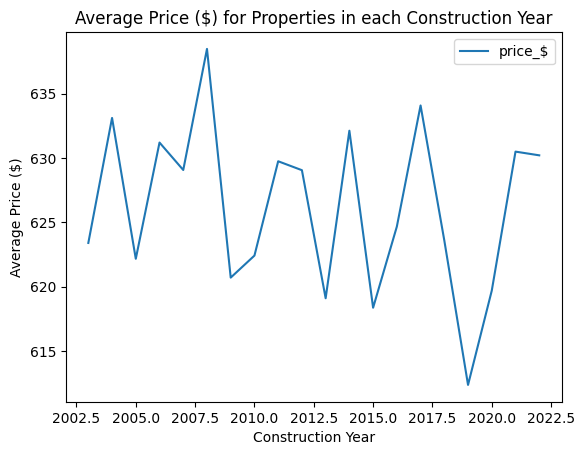

In [ ]:
df.groupby('Construction year')['price_$'].mean().to_frame().plot();
plt.xlabel('Construction Year');
plt.ylabel("Average Price ($)");
plt.title("Average Price ($) for Properties in each Construction Year");

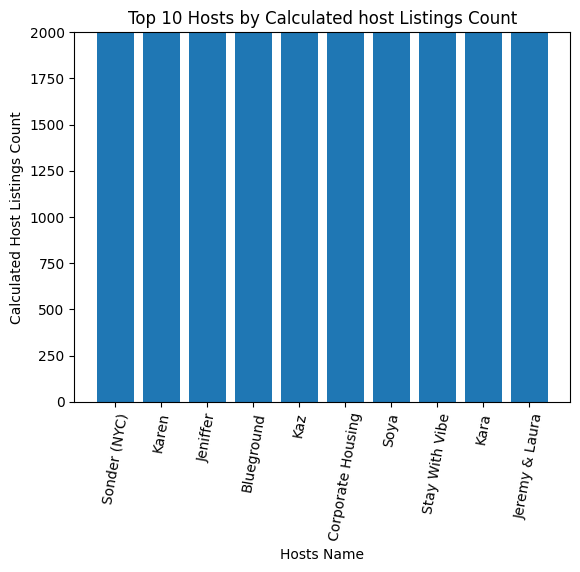

In [ ]:
hosts = df.groupby("host name")['calculated host listings count'].sum().sort_values(ascending=False).nlargest(10).to_frame()
hosts_bar = plt.bar(hosts.index, hosts.loc[:, 'calculated host listings count']);
plt.bar_label(hosts_bar, labels=hosts.loc[:, 'calculated host listings count'], label_type='edge', padding=3);
plt.xlabel("Hosts Name");
plt.ylabel("Calculated Host Listings Count");
plt.xticks(rotation=80);
plt.ylim([0, 2000]);
plt.title('Top 10 Hosts by Calculated host Listings Count');

In [ ]:
review_rate_by_verification = df.groupby("host_identity_verified")['review rate number'].mean().sort_values(ascending=False).to_frame()
review_rate_by_verification

,review rate number
host_identity_verified,
verified,3.284066
unconfirmed,3.273325


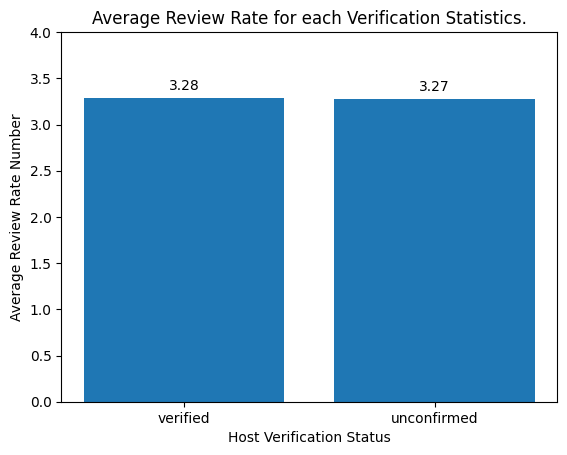

In [ ]:
review_bar = plt.bar(review_rate_by_verification.index, review_rate_by_verification.loc[:, "review rate number"]);
plt.bar_label(review_bar, labels=round(review_rate_by_verification.loc[:, "review rate number"], 2), padding=4);
plt.ylim([0, 4]);
plt.xlabel("Host Verification Status");
plt.ylabel('Average Review Rate Number');
plt.title("Average Review Rate for each Verification Statistics.");

In [ ]:
df['price_$'].corr(df['service_fee_$'])

np.float64(0.9999909082976466)